In [5]:
import numpy as np
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

In [6]:
(trainX, trainY), (data_x, data_y)= tf.keras.datasets.mnist.load_data()
_, (anomaly_img, anomaly_y) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [7]:
anomaly_x = anomaly_img[:1000]

In [8]:
# Label MNIST images as '0' (normal) and Fashion MNIST images as '1' (anomalies)
data_y = np.zeros_like(data_y)
anomaly_y = np.ones_like(np.arange(len(anomaly_x)))

In [9]:
# Concatenate MNIST and anomaly data
fdata_x = np.concatenate((data_x, anomaly_x), axis=0)
fdata_y = np.concatenate((data_y, anomaly_y), axis=0)

In [10]:
shuffled_indices = np.arange(len(fdata_y))
np.random.shuffle(shuffled_indices)

testX = fdata_x[shuffled_indices]
testY = fdata_x[shuffled_indices]

In [11]:
trainX = trainX/255.0
testX = testX/255.0

In [12]:
# Reshape the data to 1D
trainX = trainX.reshape(trainX.shape[0], -1)
testX = testX.reshape(testX.shape[0], -1)

In [13]:
input_dim = 784  # Adjust this based on your data dimensionality
encoding_dim = 32

In [14]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [15]:
autoencoder = Model(input_img, decoded)

In [16]:
autoencoder.compile(optimizer="adam", loss="mean_squared_error")

In [17]:
output = autoencoder.fit(trainX, trainX, epochs=50, batch_size=128, shuffle=True, validation_data=(testX, testX))

Epoch 1/50
469/469 [==============================] - 10s 5ms/step - loss: 0.0470 - val_loss: 0.0335
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0227 - val_loss: 0.0264
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0184 - val_loss: 0.0242
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0163 - val_loss: 0.0231
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0147 - val_loss: 0.0216
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0136 - val_loss: 0.0210
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0128 - val_loss: 0.0203
Epoch 8/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0122 - val_loss: 0.0200
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0117 - val_loss: 0.0194
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0112 - val_loss: 0.018

In [18]:
history = autoencoder.predict(testX)

344/344 [==============================] - 1s 2ms/step


In [19]:
# error = tf.reduce_mean(tf.square(history - testX), axis=1)

In [20]:
# calculate reconstruction error as anomaly score
mse = np.mean(np.power(testX - history, 2), axis=1)
error_threshold = 2 * mse.mean()
anomalies = np.sum(mse > error_threshold)

In [21]:
anomalies

950

In [22]:
import matplotlib.pyplot as plt

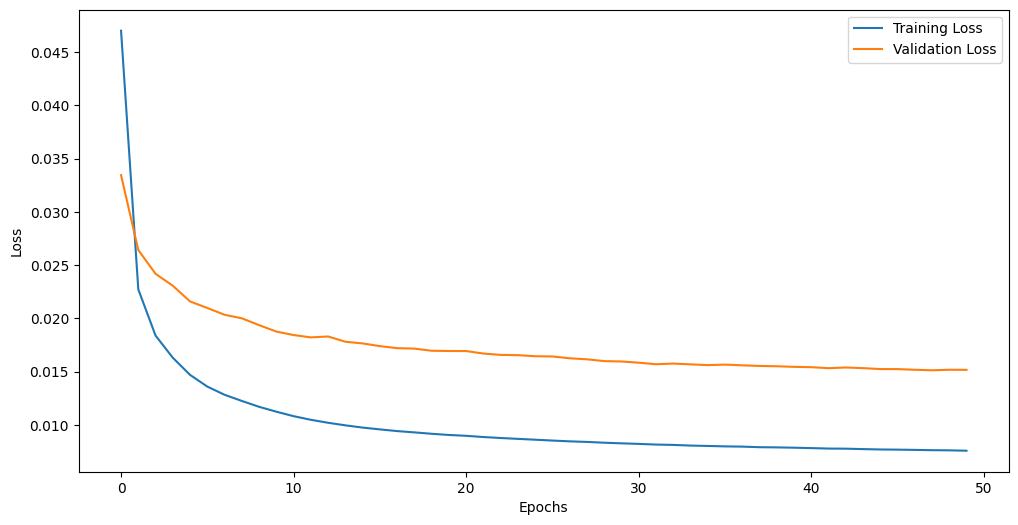

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(output.history['loss'], label='Training Loss')
plt.plot(output.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

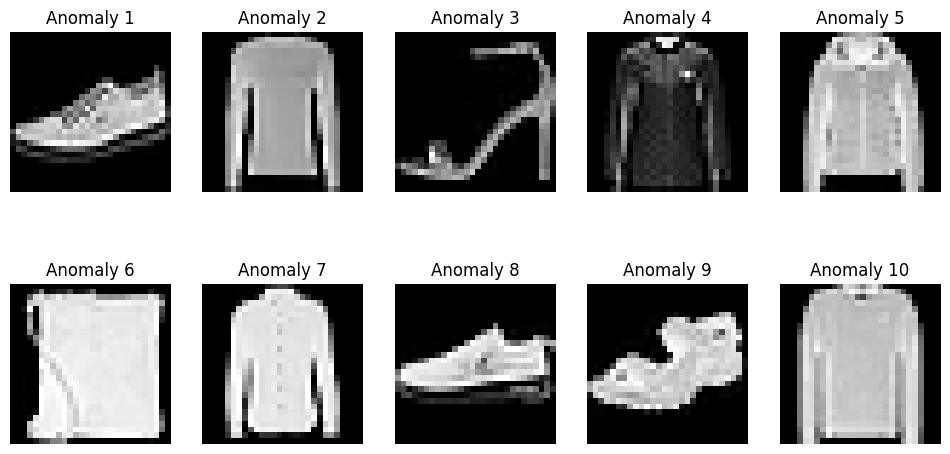

In [27]:
import matplotlib.pyplot as plt
import random

# Create a list of indices corresponding to anomalies
anomaly_indices = [i for i, is_anomaly in enumerate(mse > error_threshold) if is_anomaly]

# Plot a few random anomaly images
num_anomalies_to_plot = min(len(anomaly_indices), 10)  # Plot up to 10 anomalies
plt.figure(figsize=(12, 6))
for i in range(num_anomalies_to_plot):
    plt.subplot(2, 5, i + 1)
    index = random.choice(anomaly_indices)
    plt.imshow(testX[index].reshape(28, 28), cmap='gray')
    plt.title(f'Anomaly {i + 1}')
    plt.axis('off')

plt.show()